## Data:
    
https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset/

## Columns:

### 1 - Education: The educational qualifications of employees, including degree, institution, and field of study.

### 2 - Joining Year: The year each employee joined the company, indicating their length of service.

### 3 - City: The location or city where each employee is based or works.

### 4 - Payment Tier: Categorization of employees into different salary tiers.

### 5 - Age: The age of each employee, providing demographic insights.

### 6 - Gender: Gender identity of employees, promoting diversity analysis.

### 7 - Ever Benched: Indicates if an employee has ever been temporarily without assigned work.

### 8 - Experience in Current Domain: The number of years of experience employees have in their current field.

### 9 - Leave or Not: a target column

## 1. Uploading data

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
%matplotlib inline
from graphviz  import Source
from IPython.display import SVG, display, HTML
style = "<style>svg{width: 110% !important; height: 110% !important;} </style>" 

In [15]:
employee_data = pd.read_csv('C:/Users/user/Jupyter/my_projects_data/Employee.csv', delimiter=',', encoding='windows-1251')

In [16]:
employee_data.head(5)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


## 2. View column types and their basic information

In [17]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [18]:
employee_data.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [19]:
employee_data.Education.value_counts()

Bachelors    3601
Masters       873
PHD           179
Name: Education, dtype: int64

In [20]:
employee_data.City.value_counts()

Bangalore    2228
Pune         1268
New Delhi    1157
Name: City, dtype: int64

In [21]:
employee_data.EverBenched.value_counts()

No     4175
Yes     478
Name: EverBenched, dtype: int64

In [22]:
employee_data.Gender.value_counts()

Male      2778
Female    1875
Name: Gender, dtype: int64

## 3. Preparing data for training

In [23]:
X = employee_data.drop('LeaveOrNot', axis=1)

In [24]:
X.head(5)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
0,Bachelors,2017,Bangalore,3,34,Male,No,0
1,Bachelors,2013,Pune,1,28,Female,No,3
2,Bachelors,2014,New Delhi,3,38,Female,No,2
3,Masters,2016,Bangalore,3,27,Male,No,5
4,Masters,2017,Pune,3,24,Male,Yes,2


In [25]:
X = pd.get_dummies(X)

In [26]:
X.head(5)

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,Education_Bachelors,Education_Masters,Education_PHD,City_Bangalore,City_New Delhi,City_Pune,Gender_Female,Gender_Male,EverBenched_No,EverBenched_Yes
0,2017,3,34,0,1,0,0,1,0,0,0,1,1,0
1,2013,1,28,3,1,0,0,0,0,1,1,0,1,0
2,2014,3,38,2,1,0,0,0,1,0,1,0,1,0
3,2016,3,27,5,0,1,0,1,0,0,0,1,1,0
4,2017,3,24,2,0,1,0,0,0,1,0,1,0,1


In [27]:
X = X.drop(['Education_Bachelors', 'City_Bangalore', 'Gender_Male', 'EverBenched_No'], axis=1)

In [28]:
X.head(5)

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,Education_Masters,Education_PHD,City_New Delhi,City_Pune,Gender_Female,EverBenched_Yes
0,2017,3,34,0,0,0,0,0,0,0
1,2013,1,28,3,0,0,0,1,1,0
2,2014,3,38,2,0,0,1,0,1,0
3,2016,3,27,5,1,0,0,0,0,0
4,2017,3,24,2,1,0,0,1,0,1


In [29]:
y = employee_data.LeaveOrNot

In [30]:
y.head(5)

0    0
1    1
2    0
3    1
4    1
Name: LeaveOrNot, dtype: int64

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## 4. Training the model and finding the best depth

In [32]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [33]:
max_depth_values = range(1, 50)

In [34]:
scores_data = pd.DataFrame()

In [35]:
for i in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=i)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [i], \
                                    'train_score': [train_score], \
                                    'test_score': [test_score], \
                                    'cross_val_score': [mean_cross_val_score]})
    
    scores_data = pd.concat([scores_data, temp_score_data], ignore_index=True)

In [36]:
scores_data.head(5)

,max_depth,train_score,test_score,cross_val_score
0,1,0.730831,0.736979,0.730835
1,2,0.751684,0.761719,0.751683
2,3,0.786654,0.791016,0.786659
3,4,0.804941,0.820964,0.792754
4,5,0.837985,0.853516,0.829003


In [37]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score', 'cross_val_score'], \
                          var_name='set_type', value_name='score')

In [38]:
scores_data_long.head(5)

,max_depth,set_type,score
0,1,train_score,0.730831
1,2,train_score,0.751684
2,3,train_score,0.786654
3,4,train_score,0.804941
4,5,train_score,0.837985


In [39]:
scores_data_long.shape

(147, 3)

<Axes: xlabel='max_depth', ylabel='score'>

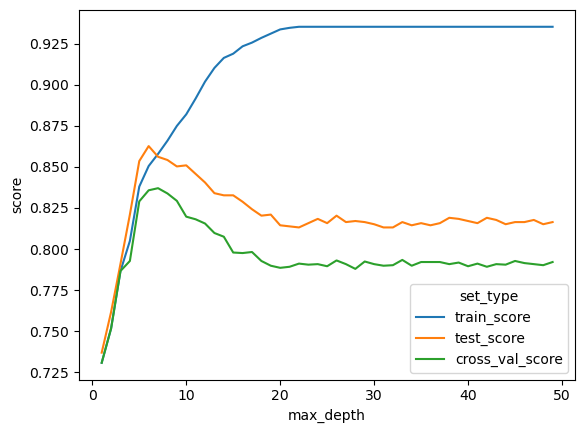

In [40]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [41]:
scores_data_long.query('set_type == "cross_val_score"').sort_values('score', ascending=False).head(7)

,max_depth,set_type,score
104,7,cross_val_score,0.837025
103,6,cross_val_score,0.835740
105,8,cross_val_score,0.833817
106,9,cross_val_score,0.829329
102,5,cross_val_score,0.829003
107,10,cross_val_score,0.819704
108,11,cross_val_score,0.818103


## 5. training model at a better depth and deriving best score

In [42]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=7)
best_clf.fit(X_train, y_train)
best_clf.score(X_test, y_test)

0.8561197916666666